In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

In [263]:
display(stud_math.head(10))
stud_math.info() 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [265]:
#Функция замены NaN на медиану в числовых столбцах 
def change_numbers_nan(column):
    stud_math[column] = stud_math[column].apply(lambda x: stud_math[column].median()
                                                if pd.isna(x) == True else x)


In [267]:
#Функция замены NaN на часто встречаемое значение для не числовых столбцов
def chahge_object_nan(column):
    
    stud_math[column] = stud_math[column].apply(lambda x: stud_math[column].value_counts().index[0] 
                                                if pd.isna(x) == True else x)


In [268]:
#Функция определение межквантильного размаха и границ выброса
def iqr_detect(column):
    
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
 
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 


## Замена номинальных данных в стобца для удобного восприятия

In [269]:
#Замена данных в столбце 'sex': F - 'woman', M - 'man'
stud_math.sex = stud_math.sex.apply(lambda x: 'woman' if x == 'F' else 'man')

In [270]:
#Замена данных в столбце 'address': U - 'town', R - 'country'
stud_math.address = stud_math.address.apply(lambda x: 'town' if x == 'U' else 'country')

In [271]:
#Замена данных в столбце 'famsize': LE3 - '3 and less', GT3 - '4 and more'
stud_math.famsize = stud_math.famsize.apply(lambda x: '4 and more' if x == 'GT3' else '3 and less')

In [272]:
#Замена данных в столбце 'Pstatus': LE3 - 'T' - together 'A' - alone
stud_math.Pstatus = stud_math.Pstatus.apply(lambda x: 'together' if x == 'T' else 'alone')

## Анализ числовых столбцов

In [273]:
#Определим числовые столбцы, так как данные изменились
numbers_columns_list = stud_math.select_dtypes(include='number').columns
numbers_columns_list

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

## Столбец age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

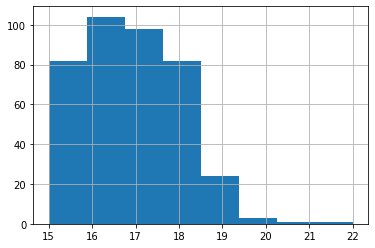

In [274]:
#посмотрим на распределение 'age'
stud_math.age.hist(bins=8)
stud_math.age.describe()

In [275]:
#определяем границы выброса для возраста
iqr_detect('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [276]:
#удалим строку с возрастом = 21
stud_math = stud_math.drop(stud_math[stud_math.age == 21].index)

## Столбец Medu

count    391.000000
mean       2.754476
std        1.095948
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

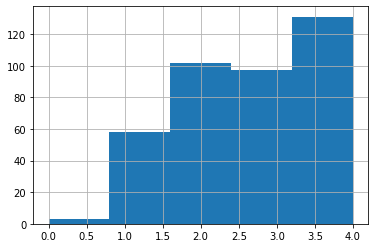

In [277]:
#посмотрим на распределение 'Medu'
stud_math.Medu.hist(bins = 5)
stud_math.Medu.describe()

In [278]:
#определяем границы выброса для возраста
iqr_detect('Medu')

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


Числовые данные в столбце по условию, соответствуют определенному уровню образования, поэтому для более удобного чтения графика
сделаем данные столбца номинативными

In [279]:
#Замена данных в столбцах 'Medu'/'Fedu': 0 - нет, 1 - 4 class, 2 - 9 class, 3 - secondary, 4 - high
def change_parents_edu(column):
    
    if column == 0:
        return 'no'
    elif column == 1:
        return '4 class'
    elif column == 2:
        return '9 class'
    elif column == 3:
        return 'secondary'
    elif column == 4:
        return 'high'

stud_math.Medu = stud_math.Medu.apply(change_parents_edu)


## Столбец Fedy

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

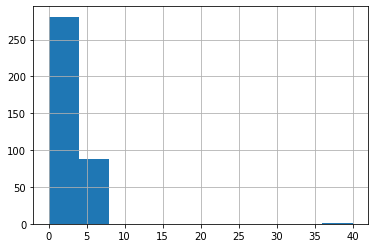

In [280]:
#посмотрим на распределение 'Fedu'
stud_math.Fedu.hist()
stud_math.Fedu.describe()

In [281]:
#определяем границы выброса для возраста
iqr_detect('Fedu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [ ]:
Среди даных встречается значени равное 40, так как по условию данные в столбце зашифрованы числами от 0 до 4, 
это скорее всего опечатка и её следует заменить на 4 

In [282]:
#заменяем значение в ячейке Fedy 40 на 4
stud_math.loc[(stud_math['Fedu'] == 40),['Fedu']] = 4

По аналогии состолбцом Medu , заменяем значения на номинативные

In [283]:
stud_math.Fedu = stud_math.Fedu.apply(change_parents_edu)

## Столбец traveltime

count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

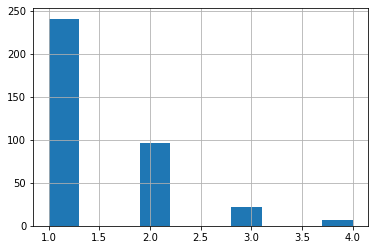

In [284]:
#посмотрим на распределение 'traveltime'
stud_math.traveltime.hist()
stud_math.traveltime.describe()

In [286]:
#определяем границы выброса для возраста
iqr_detect('traveltime')

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


Данные со значением 4 попадают за границы выброса. Так как это само по себе число 4 не является аномалльным - а лишь информацию 
о времени в пути до школы, то данные оставим и значения заменим на номинативные

In [287]:
#Замена данных в столбце 'traveltime':1 - <15 min, 2 - 15-30 min, 3 - 30-60 min, 4 - >60 min
def change_traveltime(column):
    
    if column == 1:
        return '<15 min'
    elif column == 2:
        return '15-30 min'
    elif column == 3:
        return '30-60 min'
    elif column == 4:
        return '>60 min'

stud_math.traveltime = stud_math.traveltime.apply(change_traveltime)


## Столбец studytime

count    387.000000
mean       2.041344
std        0.841505
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

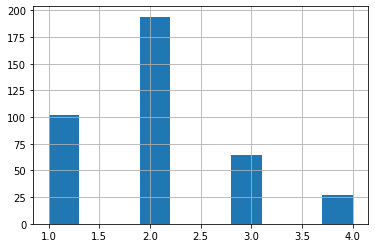

In [288]:
#посмотрим на распределение 'studytime'
stud_math.studytime.hist()
stud_math.studytime.describe()

По графику выбросов не видно. Так как данные характеризуют количество часов учебы помимо школы, также заменим значения на номинатвные

In [289]:
#Замена данных в столбце 'studytime':1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours
def change_studytime(column):
    
    if column == 1:
        return '<2 hours'
    elif column == 2:
        return '2-5 hours'
    elif column == 3:
        return '5-10 hours'
    elif column == 4:
        return '>10 hours'

stud_math.studytime = stud_math.studytime.apply(change_studytime)

## Столбец failures

count    372.000000
mean       0.330645
std        0.731152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

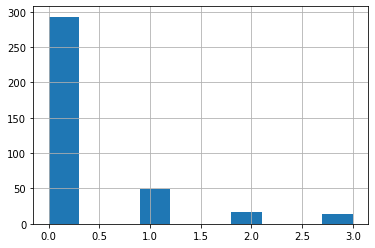

In [290]:
#посмотрим на распределение 'failures'
stud_math.failures.hist()
stud_math.failures.describe()

In [291]:
#определяем границы выброса для возраста
iqr_detect('failures')

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


In [ ]:
Какую информацию содержит столбец из описания понять сложно, Большинство значений в столбце равно нулю, 
о чем также свидетельствует межквартильный размах и границы выброса, поэтому данный столбец можно удалить.

In [292]:
#Удаление столбца с данными
stud_math.drop(['failures'], inplace = True, axis = 1)

## Столбец studytime, granular

count    387.000000
mean      -6.124031
std        2.524515
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

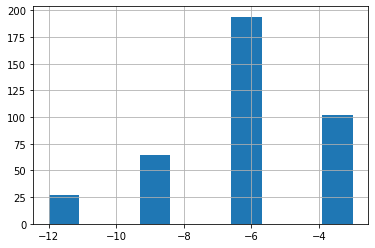

In [293]:
#посмотрим на распределение 'studytime, granular'
stud_math['studytime, granular'].hist()
stud_math['studytime, granular'].describe()

In [294]:
#определяем границы выброса для возраста
iqr_detect('studytime, granular')

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


Информация по данному столбцу в описании отсутствует. В переводе на русский название звучит как: "учебное время, зернистость" .
Данные отрицательные. Поэтому принято решение данный столбец удалить из данных. 

In [295]:
#Удаление столбца с данными
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

## Столбец famrel

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

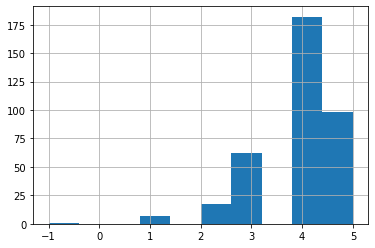

In [296]:
#посмотрим на распределение 'famrel'
stud_math.famrel.hist()
stud_math.famrel.describe()

По условиям задачи столбц содержит данные от 0 до 5. На графике видно, что есть значение -1, скорее всего это опечатка, поэтому заменим его на 1

In [297]:
#заменяем значение в ячейке Fedy 40 на 4
stud_math.loc[(stud_math['famrel'] == -1),['famrel']] = 1

Заменим значения на номинативные

In [298]:
#Функция для замены данных в столбцах famrel/health:от 1 - очень плохо до 5 - очень хорошо
def change_mark1(column):
    
    if column == 1:
        return 'very bad'
    elif column == 2:
        return 'bad'
    elif column == 3:
        return 'passably'
    elif column == 4:
        return 'good'
    elif column == 5:
        return 'very good'

stud_math.famrel = stud_math.famrel.apply(change_mark1)


## Столбец health

count    379.000000
mean       3.532982
std        1.397596
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

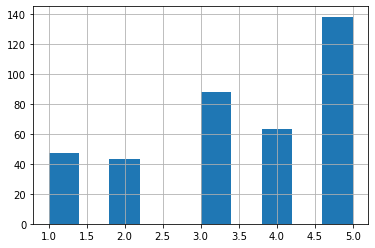

In [299]:
#посмотрим на распределение 'health'
stud_math.health.hist()
stud_math.health.describe()

In [ ]:
На графике анамалий не наблюдается, значения заменим на номинативные

In [300]:
stud_math.health = stud_math.health.apply(change_mark1)

## Столбец freetime

count    383.000000
mean       3.227154
std        0.991109
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

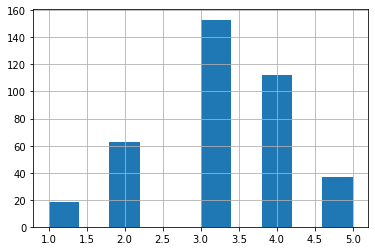

In [301]:
#посмотрим на распределение 'freetime'
stud_math.freetime.hist()
stud_math.freetime.describe()

На графике анамалий не наблюдается, значения заменим на номинативные

In [302]:
#Функция для замены данных в столбцах freetime/goout:от 1 - очень мало до 5 - очень много
def change_mark2(column):
    
    if column == 1:
        return 'very little'
    elif column == 2:
        return 'little'
    elif column == 3:
        return 'normal'
    elif column == 4:
        return 'many'
    elif column == 5:
        return 'much'

stud_math.freetime = stud_math.freetime.apply(change_mark2)


## Столбец goout

count    386.000000
mean       3.106218
std        1.117331
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

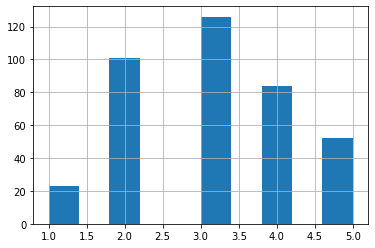

In [303]:
#посмотрим на распределение 'goout'
stud_math.goout.hist()
stud_math.goout.describe()

На графике анамалий не наблюдается, значения заменим на номинативные

In [304]:
stud_math.goout = stud_math.goout.apply(change_mark2)

## Столбец absences

count    382.000000
mean       7.290576
std       23.494945
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

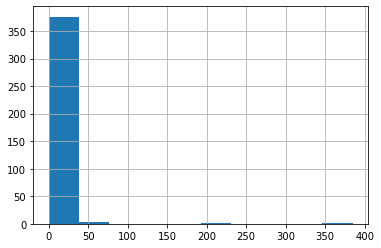

In [305]:
#посмотрим на распределение 'absences'
stud_math.absences.hist()
stud_math.absences.describe()

In [306]:
#определяем границы выброса для возраста
iqr_detect('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Большинство учащихся не пропускало занятия, поэтому даннные из столбца "absences" также не будем учитывать в дальнейших расчетах.

In [307]:
#Удаление столбца с данными
stud_math.drop(['absences'], inplace = True, axis = 1)

## Столбец score

count    388.000000
mean      52.306701
std       22.931789
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

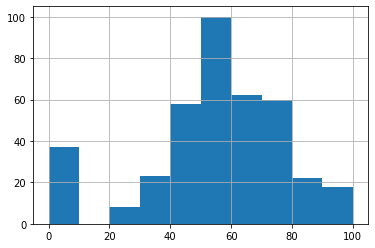

In [308]:
#посмотрим на распределение 'score'
stud_math.score.hist()
stud_math.score.describe()

In [309]:
#определяем границы выброса для возраста
iqr_detect('score')

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [ ]:
Некоторые учащиеся набрали на экзамене - 0 баллов, что исходя из теориии вероятности практически не возможно. 
Можно сделать вывод, что скоррее всего они вообще не сдавали экзамен.
Таких учащихся следует удалить из данных.

In [310]:
#Удаление учащихся набравщих на экзамене 0 баллов
stud_math = stud_math.drop(stud_math[stud_math.score == 0].index)

## Заполним недостающие данные в столбцах. Числовых и номинальных

In [312]:
#заново определим все чисоловы столбцы и заменим данные на медиану
numbers_columns_list = stud_math.select_dtypes(include='number').columns

for column in numbers_columns_list:
    change_numbers_nan(column)

In [317]:
#заново определим все номинативные столбцы и заменим данные на самое часте
object_columns_list = stud_math.select_dtypes(exclude='number').columns

for column in object_columns_list:
    chahge_object_nan(column)

## Корреляционный анализ

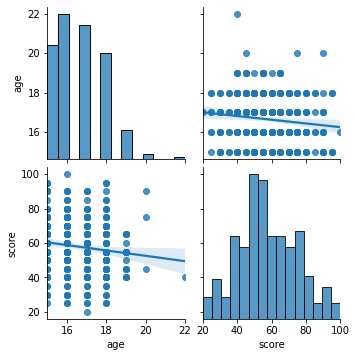

In [319]:
#построения графиков зависимости переменных
sns.pairplot(stud_math, kind = 'reg')

In [320]:
#построение матрицы корреляции
stud_math.corr()

,age,score
age,1.000000,-0.121306
score,-0.121306,1.000000


Числовых столбцов осталось только 2: age и score, между ними нет корреляционной зависимости, поэтому все они остаются для дальнейшей работы.

## Анализ номинативных переменных

In [334]:
#Определение столбцов с данными типа "object" и добавление в список
object_columns_list = stud_math.select_dtypes(exclude='number').columns
object_columns_list

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'],
      dtype='object')

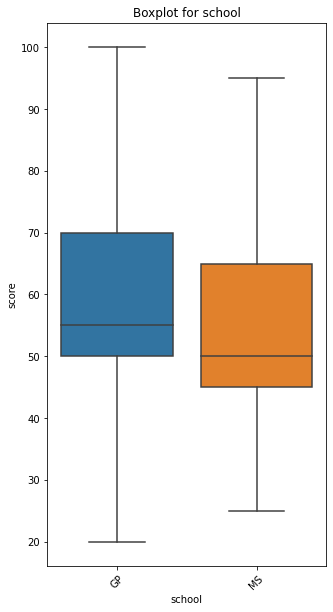

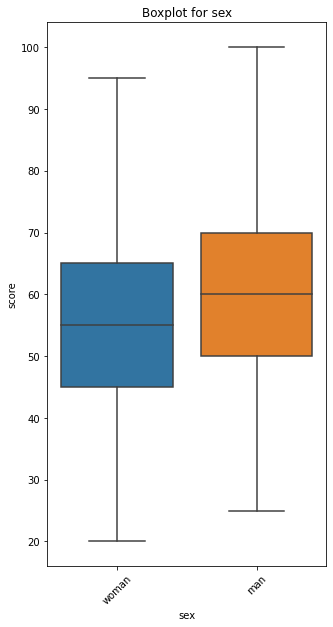

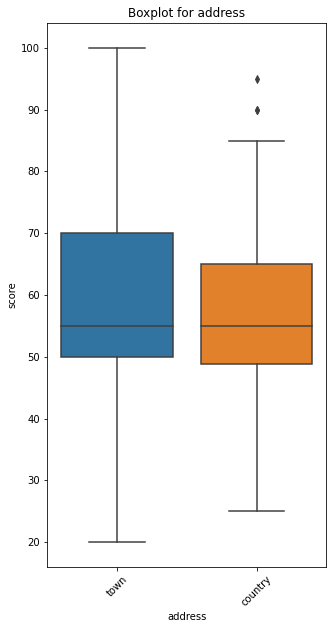

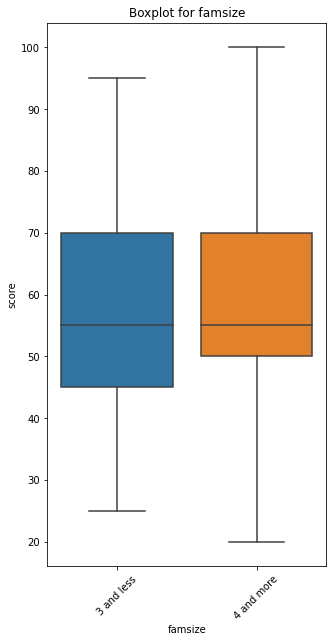

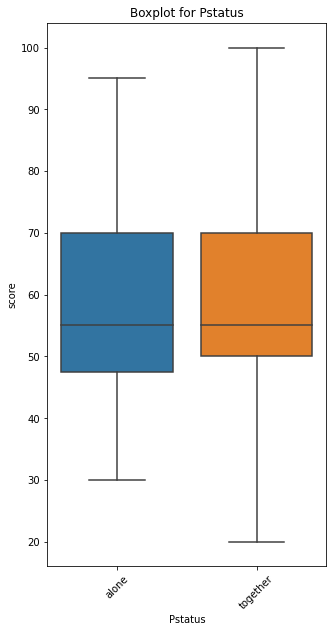

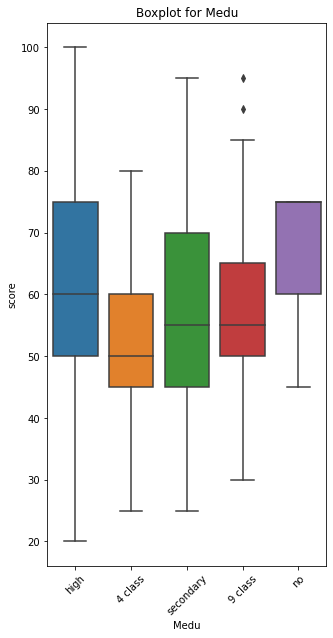

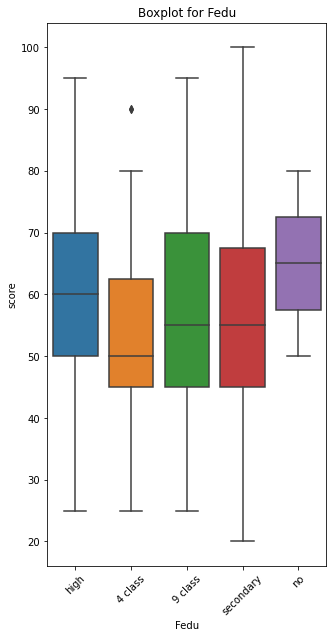

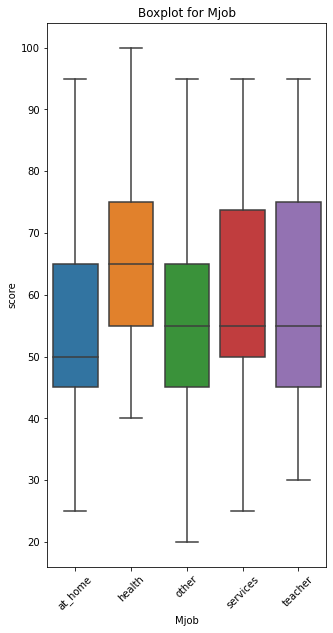

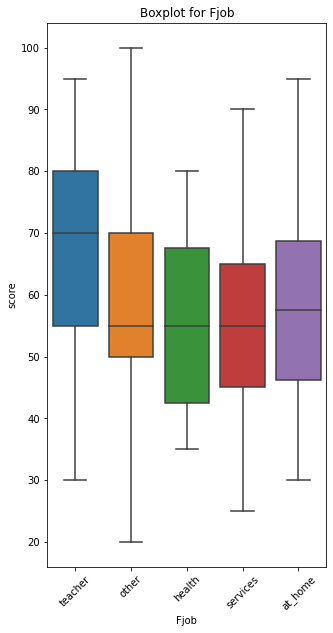

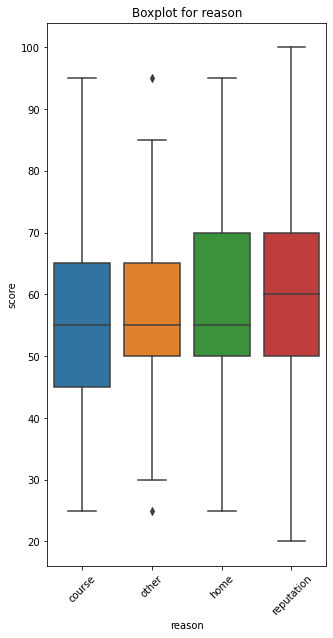

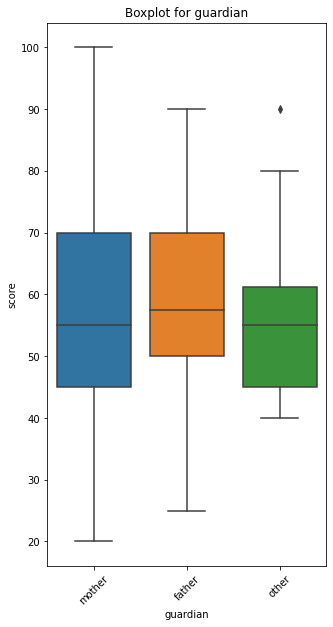

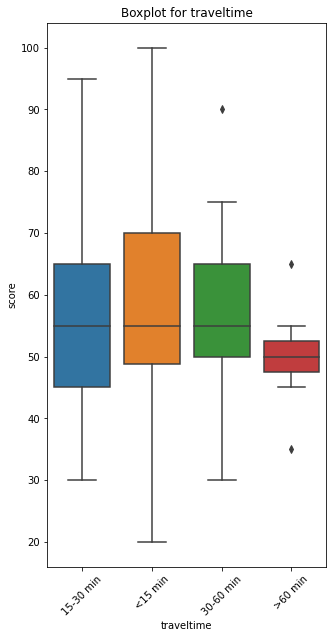

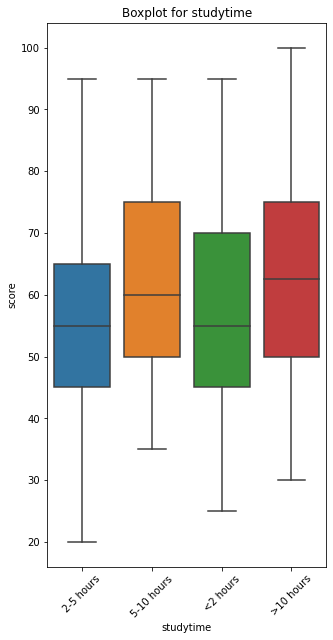

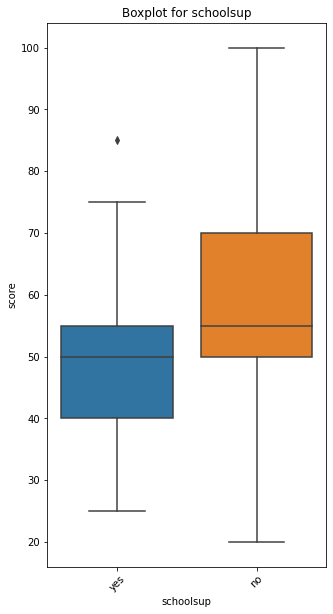

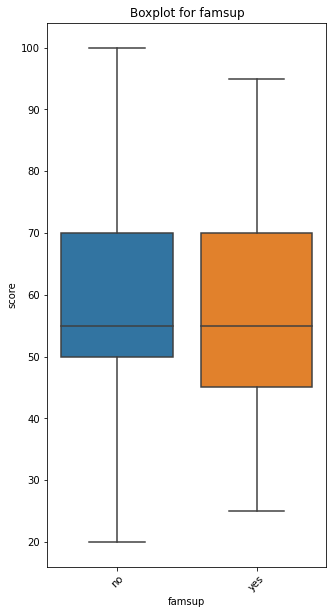

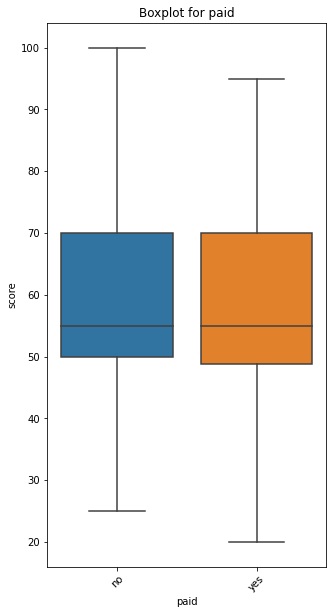

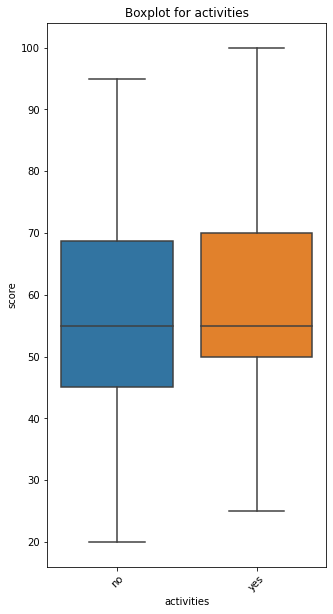

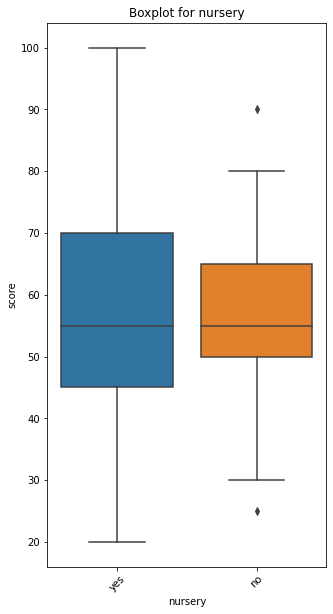

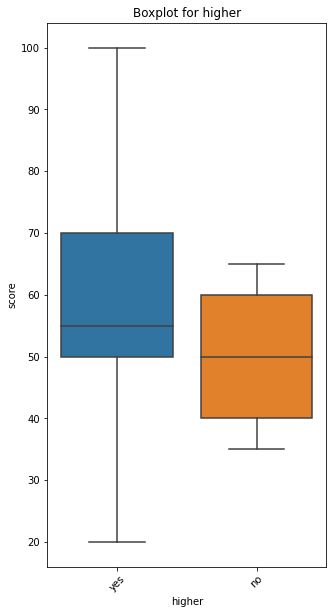

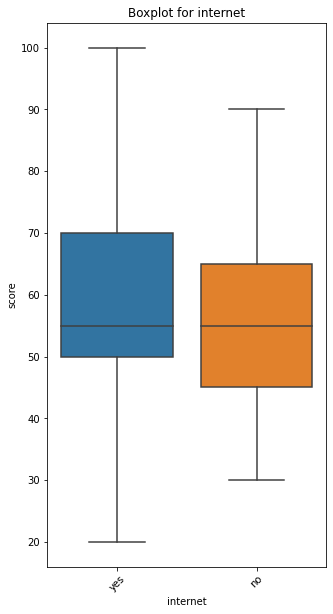

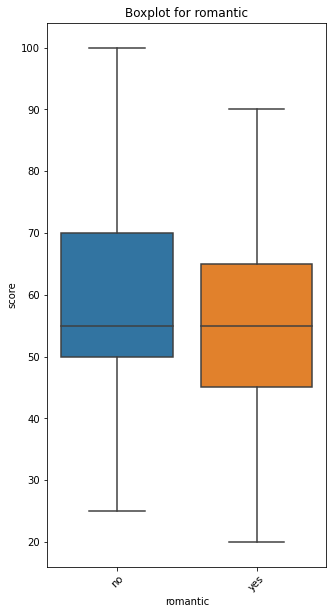

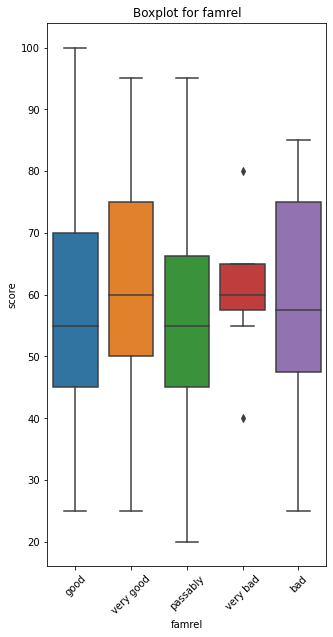

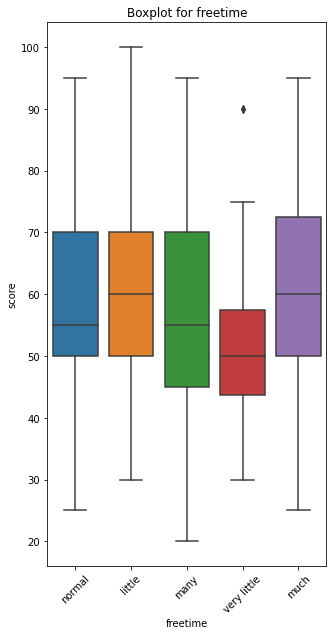

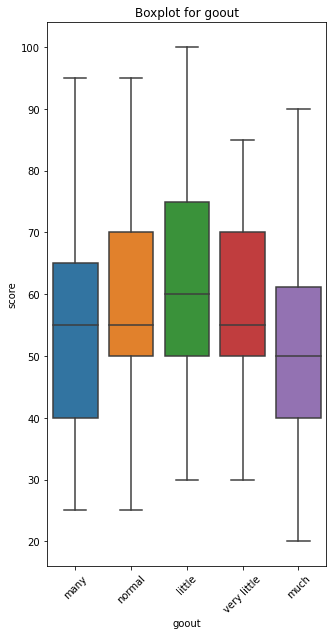

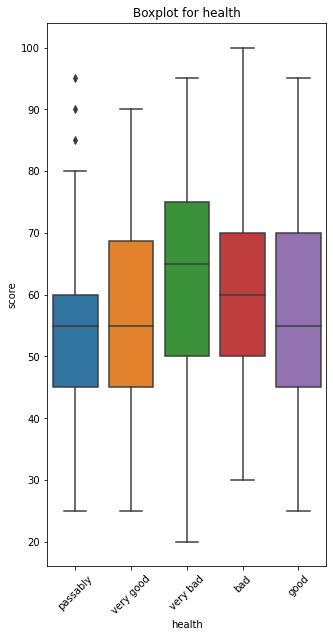

In [322]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 10))
    sns.boxplot(x=column, y='score', data=stud_math, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
object_columns_list = stud_math.select_dtypes(exclude='number').columns
for col in object_columns_list:
    get_boxplot(col)

По графикам видно, что все параметры могут влиять на оценку участника.
Проверим, есть ли статистической разницы в распределении оценок по номинативным признакам, с помощью теста Стьюдента

In [331]:
#Функция определения статистической значимости с помощью Теста Стьюдента
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [332]:
for col in object_columns_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Тест показал, что серьезно различаются следующие параметры: sex, address, Medu, Fedu, Mjob, Fjob, studytime, schoolsup, goout
Оставим эти переменные в датасете для дальнейшего построения модели.

В итоге для дальгнйшего исследования оставляем следующие столбцы:
age, sex, address, Medu, Fedu, Mjob, Fjob, studytime, schoolsup, goout, score

## Вывод

в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:
    - большинство данных заполнены корректно, выбросы найдены в столбце 'age' были удалены как статистически не значимые.
    - единичные случае никорректного заполнения данных в столбцах 'Fedy' и 'famrel' заменены на корректные
    - строки со значения в столбце 'score' равные 0, удалены из таблицы, так как эти учащиеся скорее всего не были на экзамене
    - для столбцов 'Fedy', 'Medy', 'traveltime', 'studytime','famrel', 'health' 'freetime' и 'goout' в соответствии с условиями задачи данные заменены на номинальные
    - незаполненные данные для числовых значений заменены на медиану
    - незаполненные данные для номинальных значений заменены на самое частое значение
    - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: age, sex, address, Medu, Fedu, Mjob, Fjob, studytime, schoolsup, goout, score